In [1]:
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.compat.v1.set_random_seed(42)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
img_points = pd.read_csv('./data/points_cloud.csv')
world_points = pd.read_csv("./data/worldpoints.csv")
center_points = pd.read_csv("./data/centerpoints.csv",header=None)

# interpolate_1 = pd.read_csv("./data/centerpoints_interpolate.csv")
# interpolate_2 = pd.read_csv("./data/interpolate_progressed.csv")

# frames = [img_points, world_points]
# data = pd.concat(frames, axis=1)

In [9]:
def load_scaler_():

    '''
    interpolate_1 = pd.read_csv("./data/centerpoints_interpolate.csv")
    interpolate_2 = pd.read_csv("./data/interpolate_progressed.csv")
    interpolate = pd.concat([interpolate_1, interpolate_2],axis=0)
    '''
    frames = [img_points, world_points]

    csv = pd.concat(frames, axis=1)
    center_points_ = pd.DataFrame(np.array(center_points),columns=csv.columns)
    #csv_center = pd.DataFrame(np.array(center_points),columns=["0x","0y","1x","1y","2x","2y","3x","3y","4x","4y","5x","5y","6x","6y","7x","7y","x","y","z"])
    #print(center_points)
    frames = [csv, center_points_]
    all_csv = pd.concat(frames, axis=0)

    # all_csv = all_csv.iloc[:,lambda df:[2,3,4,5,10,11,12,13,16,17,18]]
    # interpolate = interpolate.iloc[:,lambda df:[2,3,4,5,10,11,12,13,16,17,18]]

    all_csv = all_csv.sample(frac=1)
    train_val, test = train_test_split(all_csv, test_size=0.1)
    val_pct = 1 / 9
    train, val = train_test_split(train_val, test_size=val_pct)
    '''
    # 混入插值点到val

    percentage = len(val) / len(interpolate)
    mixin = interpolate.sample(frac=percentage)
    val = pd.concat([val, mixin], axis=0)
    '''

    # 归一化
    scaler = StandardScaler()
    train = scaler.fit_transform(train)

    return scaler
scaler = load_scaler_()

In [4]:
def load_data_origin():
    frames = [img_points, world_points]
    data = pd.concat(frames,axis=1)
    return data

data_origin = load_data_origin()

In [19]:
def load_data_linar():
    interpolate_2 = pd.read_csv("./data/interpolate_progressed.csv")
    all_csv = interpolate_2
    return all_csv

data_linar = load_data_linar()

In [4]:
# centerpoint data
def load_data_centerpoint():
    centerpoints = pd.DataFrame(np.array(center_points), columns=["0x","0y","1x","1y","2x","2y","3x","3y","4x","4y","5x","5y","6x","6y","7x","7y","x","y","z"])
    csv_center = pd.DataFrame(np.array(centerpoints),columns=["0x","0y","1x","1y","2x","2y","3x","3y","4x","4y","5x","5y","6x","6y","7x","7y","x","y","z"])
    all_csv = csv_center

    return all_csv

data_centerpoint = load_data_centerpoint()

In [5]:
def load_scaler():
    
    # interpolate_1 = pd.read_csv("./data/centerpoints_interpolate.csv")
    # interpolate_2 = pd.read_csv("./data/interpolate_progressed.csv")
    # interpolate = pd.concat([interpolate_1, interpolate_2],axis=0)
    csv = load_data_origin()



    column_list = ["0x","0y","1x","1y","2x","2y","3x","3y","4x","4y","5x","5y","6x","6y","7x","7y","x","y","z"]
    centerpoints = pd.DataFrame(np.array(center_points), columns=column_list)
    # csv_center = pd.DataFrame(np.array(center_points),columns=column_list).iloc[:,lambda df:[2,3,4,5,10,11,12,13]]
    frames = [csv, center_points]
    all_csv = pd.concat(frames, axis=0)

    # all_csv = all_csv.iloc[:,lambda df:[2,3,4,5,10,11,12,13,16,17,18]]

    # all_csv = csv
    # all_csv = data_origin

    all_csv = all_csv.sample(frac=1)
    train_val, test = train_test_split(all_csv, test_size=0.1)
    val_pct = 1 / 9
    train, val = train_test_split(train_val, test_size=val_pct)

    
    # 混入插值点到val

    # percentage = len(val) / len(interpolate)
    # mixin = interpolate.sample(frac=percentage)
    # val = pd.concat([val, mixin], axis=0)
    

    # 归一化
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    # val = scaler.transform(val)
    # test = scaler.transform(test)

    return scaler

scaler = load_scaler()


In [5]:
model = load_model("./model/best_model/model.h5")
# model = tf.saved_model.load("./model/retrain_2/retrain_model.ckpt/saved_model.pb")

In [10]:
def predict_(data, scaler, model):
    cam_num = 8
    np.set_printoptions(suppress=True)
    '''
    rows = data.shape[0]
    for col in ['x', 'y', 'z']:
        data[col] = [0 for i in range(rows)]
    '''
    # print(data)
    actual = data.iloc[:, 2*cam_num:]
    test = scaler.transform(data)
    predict = scaler.inverse_transform(np.hstack((test[:, :2*cam_num], model.predict(test[:, :2*cam_num]))))[:, 2*cam_num:]
    print("predict:\n-----------------------------------------")
    print(predict)
    
    print("model test MAE:" + str(mean_absolute_error(actual, predict)))
    print("model x MAE:" + str(mean_absolute_error(actual.iloc[:, 0], predict[:, 0])))
    print("model y MAE:" + str(mean_absolute_error(actual.iloc[:, 1], predict[:, 1])))
    print("model z MAE:" + str(mean_absolute_error(actual.iloc[:, 2], predict[:, 2])))
    return predict

predict = predict_(data_origin,scaler,model)
# predict_1 = predict_(data_origin, scaler, model)


predict:
-----------------------------------------
[[  -0.1015779     0.22186324    0.22882378]
 [  -0.18897022    4.046029      0.1043315 ]
 [  -0.18353021    7.79562092    0.09755242]
 ...
 [1136.59667506  750.58612017  299.60912988]
 [1136.60998155  754.45237268  299.57910527]
 [1136.60841608  758.29218038  299.57590404]]
model test MAE:0.08518752343350101
model x MAE:0.08832764670313066
model y MAE:0.0785692034099699
model z MAE:0.08866572018739241


In [12]:
err = np.abs(predict - np.array(data_origin.iloc[:,16:]))
# err_1 = np.abs(predict_1 - np.array(data_origin.iloc[:,16:]))

In [21]:
predict_2 = predict_(data_linar, scaler, model)
err_2 = np.abs(predict_2 - np.array(data_linar.iloc[:,16:]))

predict:
-----------------------------------------
[[   0.61045817    2.88619264    0.95603814]
 [   0.5228734     6.6407584     0.88102483]
 [   0.48146401   10.36764263    0.82767553]
 ...
 [1136.19605425  748.98213209  299.61296251]
 [1136.26176236  752.94343535  299.63400934]
 [1136.35981667  756.93244623  299.64766048]]
model test MAE:0.14949326473909164
model x MAE:0.16286125250904912
model y MAE:0.12428276080859622
model z MAE:0.16133578089965148


In [21]:
num = 200*299 # 原数据每层点数
# num = 199*298 # 中心点数据每层点数
# num = 199*299 # 线性插值每层点数

total_error = []
MSE_error = []
x_error = []
y_error = []
z_error = []
for z in range(76):
    layer_x_error = np.mean(err[:,0][z*num:(z+1)*num])
    x_error.append(layer_x_error)

    layer_y_error = np.mean(err[:,1][z*num:(z+1)*num])
    y_error.append(layer_y_error)

    layer_z_error = np.mean(err[:,2][z*num:(z+1)*num])
    z_error.append(layer_z_error)


for i in range(76):
    error = ((x_error[i])**2 + (y_error[i])**2 + (z_error[i])**2) ** 0.5
    # error = ((x_error[i])**2 + (y_error[i])**2 + (z_error[i])**2) ** 0.5
    # mse_error = ((x_error[i])**2 + (z_error[i])**2) ** 0.5
    total_error.append(error)


In [13]:
def error_xyz(err, num):
    x_error, y_error, z_error = [], [], []
    for z in range(76):
        layer_x_error = np.mean(err[:,0][z*num:(z+1)*num])
        x_error.append(layer_x_error)

        layer_y_error = np.mean(err[:,1][z*num:(z+1)*num])
        y_error.append(layer_y_error)

        layer_z_error = np.mean(err[:,2][z*num:(z+1)*num])
        z_error.append(layer_z_error)
    
    return x_error, y_error, z_error

In [14]:
num = 200*299
x_error, y_error, z_error = error_xyz(err, num)
# x_error_1, y_error_1, z_error_1 = error_xyz(err_1, num)

In [22]:
# x_error_2, y_error_2, z_error_2 = error_xyz(err_2, num)

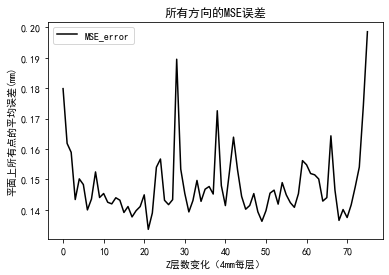

In [22]:
direction = "MSE"
to_draw = "{},{}_origin,{}_linear".format(direction,direction,direction)
z = np.arange(76)
# L1 = plt.plot(z,x_error,"r",label="X_error")
# L6 = plt.plot(z,x_error_1,"b",label="X_origin_error")
# L7 = plt.plot(z,x_error_2,"g",label="X_linear_error")
# L2 = plt.plot(z,y_error,"b",label="Y_error")
# L6 = plt.plot(z,y_error_1,"r",label="Y_origin_error")
# L6 = plt.plot(z,y_error_2,"g",label="Y_linear_error")
# L3 = plt.plot(z,z_error,"g",label="Z_error")
# L6 = plt.plot(z,z_error_1,"r",label="Z_origin_error")
# L6 = plt.plot(z,z_error_2,"b",label="Z_linear_error")
L4 = plt.plot(z,total_error,"black",label="MSE_error")
# L5 = plt.plot(z,total_error,"brown",label="XZ_MSE_error")

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["font.family"]="sans-serif"
plt.xlabel("Z层数变化（4mm每层）")
plt.ylabel("平面上所有点的平均误差(mm)")
# plt.title("{}方向误差随Z层数变化趋势".format(direction))
plt.title("所有方向的{}误差".format(direction))
plt.legend()
plt.savefig("./model/best_model/{}_error.jpg".format(direction))
# plt.show()
